# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

//anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


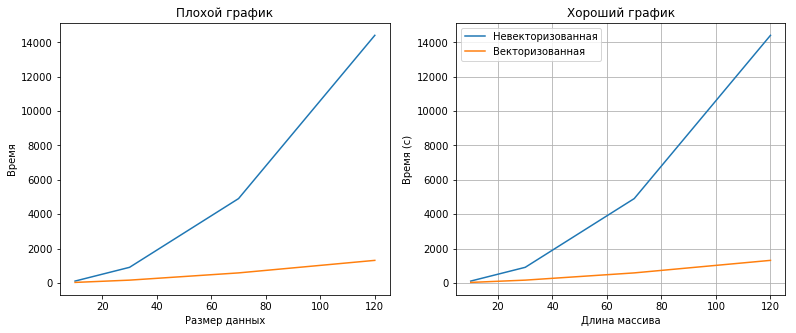

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

In [1]:
import numpy as np

X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])

a = np.diag(X)
a = a[a != 0]
k = np.prod(a)
print(k)


3
3


 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


In [2]:
import numpy as np

x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])
x.sort()
y.sort()
print(np.array_equal(x, y))


True
True


* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

In [3]:
import numpy as np

x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
mask = (x == 0)
mask = mask[:-1]
print(x[1:][mask].max())

5
5


 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


[[[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [251 251 251]
  [252 252 252]
  [253 253 253]]

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [251 251 251]
  [252 252 252]
  [253 253 253]]

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [251 251 251]
  [252 252 252]
  [253 253 253]]

 ...

 [[253 253 253]
  [253 253 253]
  [254 254 254]
  ...
  [ 53  50  59]
  [ 53  50  59]
  [ 53  50  59]]

 [[253 253 253]
  [253 253 253]
  [254 254 254]
  ...
  [ 51  48  55]
  [ 51  48  55]
  [ 51  48  55]]

 [[253 253 253]
  [253 253 253]
  [254 254 254]
  ...
  [ 51  48  55]
  [ 50  47  54]
  [ 50  47  54]]]


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

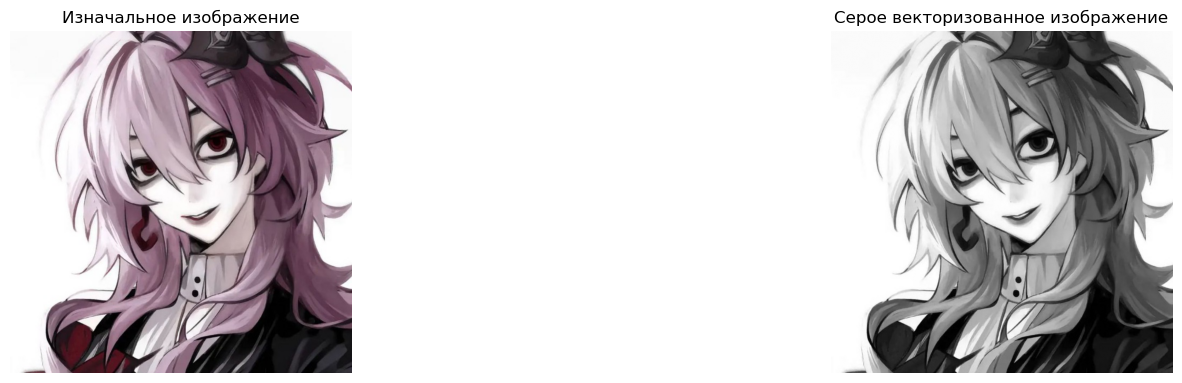

In [3]:
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("photo_2025-09-17 18.53.08.jpeg")


img_arr = np.asarray(img)
img_arr_1 = img_arr.tolist()



def vector_summ(image, weights):
    
    return np.tensordot(image, weights, axes=([2], [0]))


gray_weights = np.array([0.299, 0.587, 0.114])

plt.figure(figsize = (15, 10))


plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Изначальное изображение')
plt.axis('off')


plt.subplot(1, 3, 3)
gray_img_2 = vector_summ(img_arr, gray_weights)
plt.imshow(gray_img_2, cmap='gray')
plt.title('Серое векторизованное изображение')
plt.axis('off')

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [22]:
import numpy as np
x = np.array([2, 2, 2, 3, 3, 3, 5])
x1, x2 = np.unique(x, return_counts=True)
print((x1, x2))

([2, 3, 5], [3, 3, 1])
(array([2, 3, 5]), array([3, 3, 1]))


 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

In [6]:
import numpy as np
from scipy.spatial import distance
import time


X = np.random.rand(25, 3)
Y = np.random.rand(50, 3)



def vector_evc_dist(X, Y):
   
    X_2 = np.sum(X ** 2, axis=1, keepdims=True)
    
    Y_2 = np.sum(Y ** 2, axis=1)
    
    XY = np.dot(X, Y.T)
    return np.sqrt(X_2 - 2 * XY + Y_2)



print('Сравнение co scipy:')


start = time.time()
result = vector_evc_dist(X, Y)
end = time.time() - start


scipy_start = time.time()
scipy_result = distance.cdist(X, Y, 'euclidean')
scipy_end = time.time() - scipy_start


print('Векторная реализация: ' + str(end) + ' секунд')
print('Scipy cdist: ' + str(scipy_end) + ' секунд')
dif = end/scipy_end

print('Scipy быстрее векторной реализации в ' + str(dif) + 'раз')
print(result)
print(scipy_result)


Сравнение co scipy:
[2.26861894 0.53651304 0.87639658 0.48735433 0.40454697 1.05745953
 0.35192245 1.35904704 0.67471929 0.57623233 0.66586211 0.71308454
 1.68992965 1.67654752 0.31638503 0.10642666 0.81239891 0.99445624
 1.18084077 0.0396697  1.27938089 0.49903457 1.16573282 0.59538261
 2.04558102 0.52438029 1.51876496 1.02421146 1.13032181 0.91019447
 0.55559263 0.87096433 1.00703682 1.32436677 1.29417573 0.59065368
 0.62749481 0.49630686 1.67257632 0.82583979 0.42831736 1.82632239
 1.46846341 0.77972889 1.09990185 0.90822592 0.86780219 0.67836711
 0.11753108 0.90083379]
Векторная реализация: 0.001232147216796875 секунд
Scipy cdist: 0.0002167224884033203 секунд
Scipy быстрее векторной реализации в 5.6853685368536855раз
[[1.02845128 0.74883306 0.91606996 ... 0.46053359 0.54728458 0.61926473]
 [1.33877575 0.55168971 0.87491372 ... 0.84735203 0.18524783 0.75019552]
 [1.23741124 0.40435562 0.4604055  ... 0.55881455 0.32557167 0.73955136]
 ...
 [0.62145672 0.59825704 0.49223616 ... 0.7162

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

# В этой домашке я узнала о многих функциях numpy

__Как работать с массивами в numpy__

_В чем отличие np.array и list_

<u>И узнала больше о matpolib<u>

~~ВСЁ~~